In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import ShuffleSplit

In [2]:
ames_housing = pd.read_csv("datasets/ames_housing_no_missing.csv")
features_of_interest = [
    "LotFrontage",
    "LotArea",
    "PoolArea",
    "YearBuilt",
    "YrSold",
]
target_name = "SalePrice"
data, target = (
    ames_housing[features_of_interest],
    ames_housing[target_name],
)

In [3]:
linear_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), LinearRegression()
).set_output(transform="pandas")
cv_results = cross_validate(
    linear_regression,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

In [4]:
train_error = -cv_results["train_score"]
print(
    "Mean squared error of linear regression model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

test_error = -cv_results["test_score"]
print(
    "Mean squared error of linear regression model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of linear regression model on the train set:
2.85e+09 ± 8.63e+07
Mean squared error of linear regression model on the test set:
8.69e+10 ± 2.47e+11


In [5]:
model_first_fold = cv_results["estimator"][0]
model_first_fold

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [6]:
feature_names = model_first_fold[-1].feature_names_in_
feature_names

array(['LotFrontage', 'LotArea', 'PoolArea', 'YearBuilt', 'YrSold',
       'LotFrontage^2', 'LotFrontage LotArea', 'LotFrontage PoolArea',
       'LotFrontage YearBuilt', 'LotFrontage YrSold', 'LotArea^2',
       'LotArea PoolArea', 'LotArea YearBuilt', 'LotArea YrSold',
       'PoolArea^2', 'PoolArea YearBuilt', 'PoolArea YrSold',
       'YearBuilt^2', 'YearBuilt YrSold', 'YrSold^2'], dtype=object)

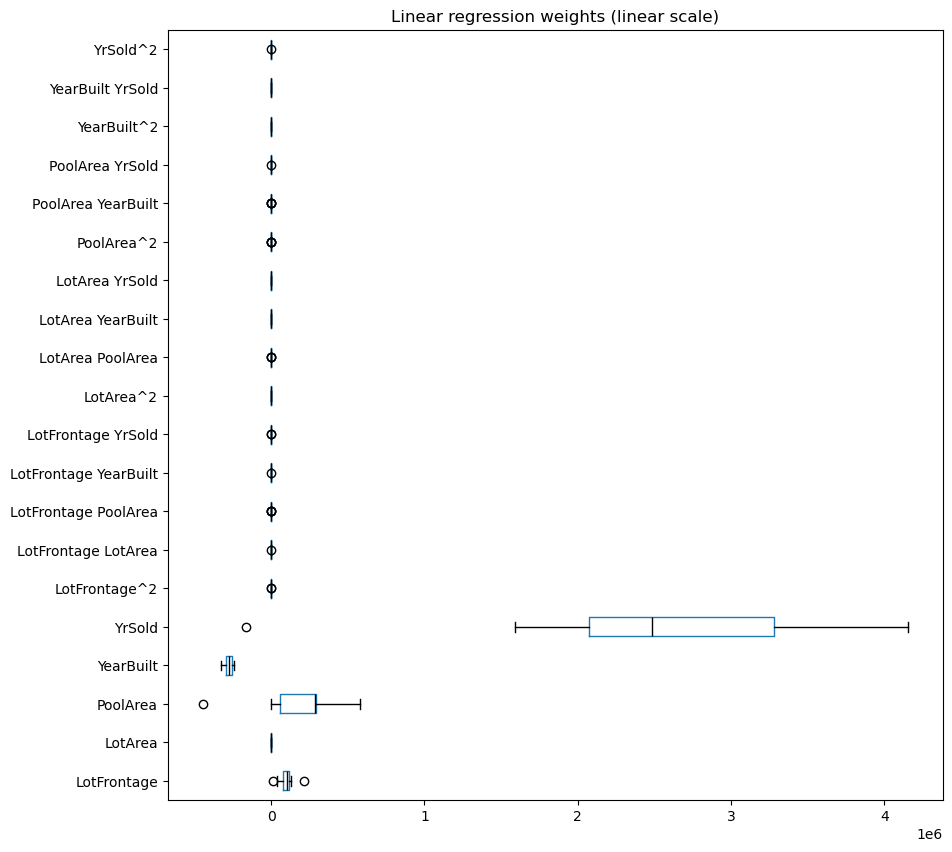

In [7]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=feature_names)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_linear_regression.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Linear regression weights (linear scale)")

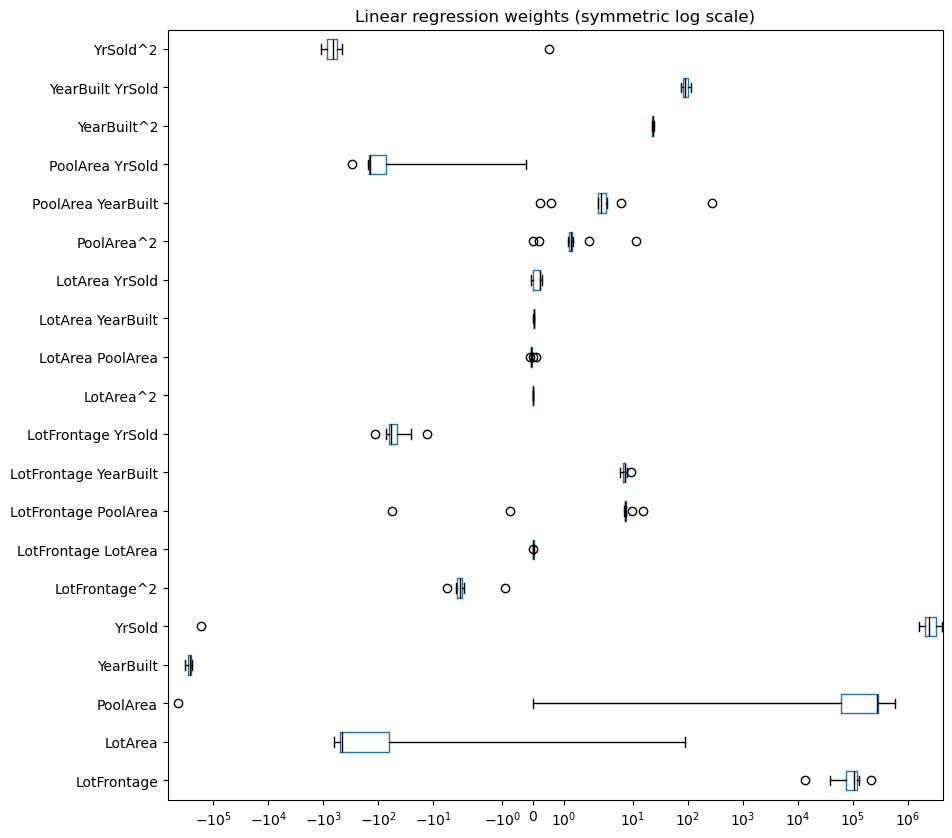

In [8]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_linear_regression.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(
    title="Linear regression weights (symmetric log scale)",
    xscale="symlog",
)

In [9]:
ridge = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=100, solver="cholesky"),
)
cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=20,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

C:\Users\dempseyj\AppData\Local\anaconda3\envs\scikit-learn-course\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59923e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\dempseyj\AppData\Local\anaconda3\envs\scikit-learn-course\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59556e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\dempseyj\AppData\Local\anaconda3\envs\scikit-learn-course\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59609e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\dempseyj\AppData\Local\anaconda3\envs\scikit-learn-course\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.11828e-20): r

In [10]:
train_error = -cv_results["train_score"]
print(
    "Mean squared error of ridge model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

test_error = -cv_results["test_score"]
print(
    "Mean squared error of ridge model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of ridge model on the train set:
2.90e+09 ± 6.56e+07
Mean squared error of ridge model on the test set:
4.55e+10 ± 1.68e+11


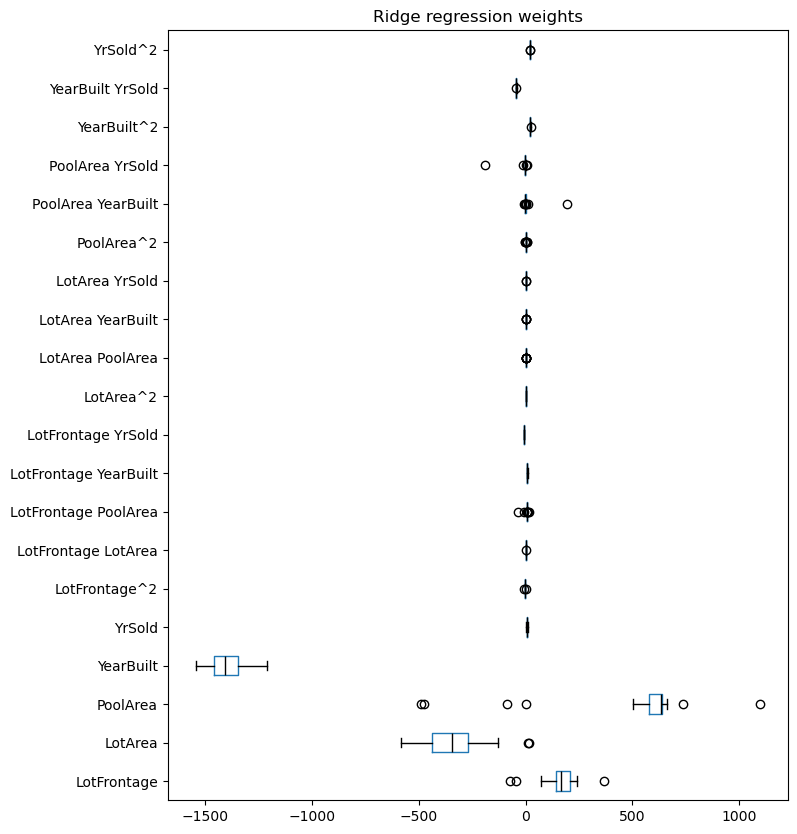

In [11]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights")

In [12]:
scaled_ridge = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=10, solver="cholesky"),
)
cv_results = cross_validate(
    scaled_ridge,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

Mean squared error of scaled ridge model on the train set:
3.78e+09 ± 1.21e+08
Mean squared error of scaled ridge model on the test set:
3.83e+09 ± 1.17e+09


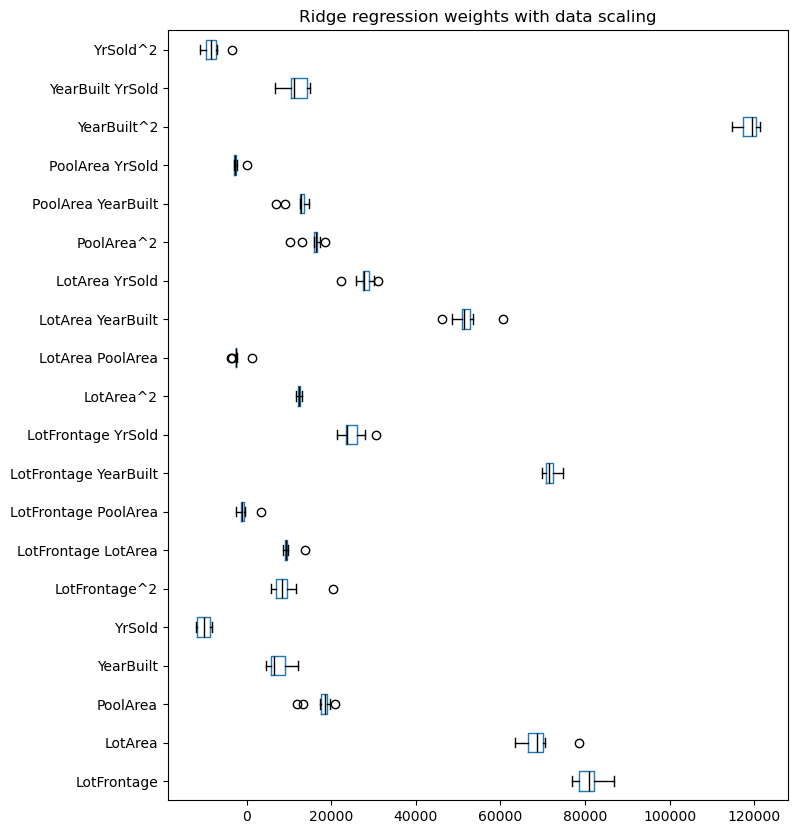

In [13]:
train_error = -cv_results["train_score"]
print(
    "Mean squared error of scaled ridge model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

test_error = -cv_results["test_score"]
print(
    "Mean squared error of scaled ridge model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_scaled_data = pd.DataFrame(coefs, columns=feature_names)

fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge_scaled_data.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights with data scaling")

In [14]:
ridge_large_alpha = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1_000_000, solver="lsqr"),
)
cv_results = cross_validate(
    ridge_large_alpha,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

In [15]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_scaled_data = pd.DataFrame(coefs, columns=feature_names)

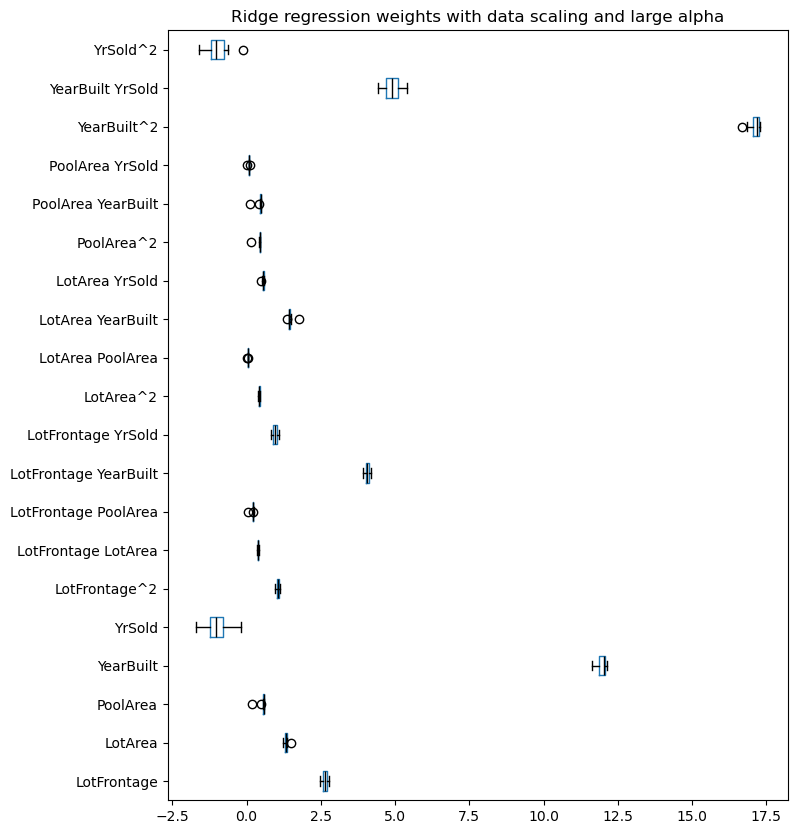

In [16]:
fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge_scaled_data.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights with data scaling and large alpha")

In [17]:
alphas = np.logspace(-7, 5, num=100)
ridge = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RidgeCV(alphas=alphas, store_cv_values=True),
)

In [18]:
cv = ShuffleSplit(n_splits=50, random_state=0)
cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=cv,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
    n_jobs=2,
)

In [19]:
train_error = -cv_results["train_score"]
print(
    "Mean squared error of tuned ridge model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

test_error = -cv_results["test_score"]
print(
    "Mean squared error of tuned ridge model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of tuned ridge model on the train set:
3.12e+09 ± 1.25e+08
Mean squared error of tuned ridge model on the test set:
3.50e+09 ± 1.40e+09


In [20]:
mse_alphas = [
    est[-1].cv_values_.mean(axis=0) for est in cv_results["estimator"]
]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas = cv_alphas.aggregate(["mean", "std"]).T
cv_alphas

,mean,std
1.000000e-07,5.841881e+10,5.347783e+10
1.321941e-07,5.837563e+10,5.343115e+10
1.747528e-07,5.831866e+10,5.336956e+10
2.310130e-07,5.824352e+10,5.328835e+10
3.053856e-07,5.814452e+10,5.318133e+10
...,...,...
3.274549e+04,6.319038e+09,1.337394e+08
4.328761e+04,6.324503e+09,1.338181e+08
5.722368e+04,6.328652e+09,1.338778e+08
7.564633e+04,6.331799e+09,1.339232e+08


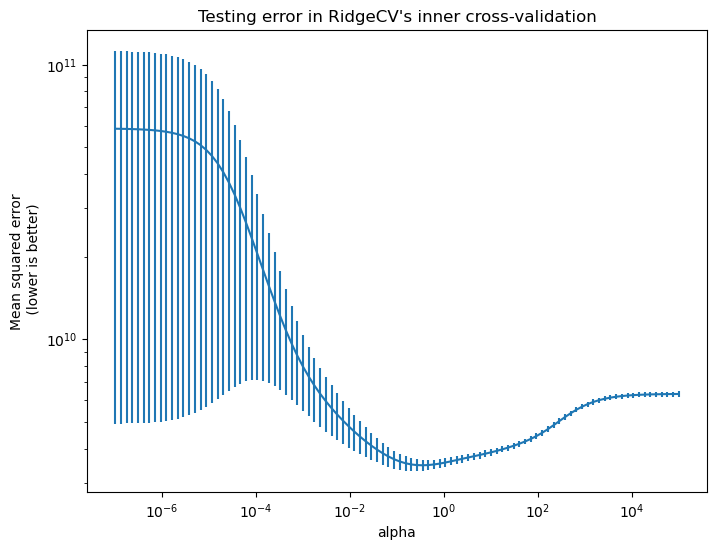

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(cv_alphas.index, cv_alphas["mean"], yerr=cv_alphas["std"])
_ = ax.set(
    xscale="log",
    xlabel="alpha",
    yscale="log",
    ylabel="Mean squared error\n (lower is better)",
    title="Testing error in RidgeCV's inner cross-validation",
)

In [22]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[0.11497569953977356,
 0.35111917342151344,
 0.1519911082952933,
 0.35111917342151344,
 0.11497569953977356,
 0.4641588833612782,
 0.4641588833612782,
 0.4641588833612782,
 0.4641588833612782,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.11497569953977356,
 0.11497569953977356,
 0.35111917342151344,
 0.4641588833612782,
 0.11497569953977356,
 0.35111917342151344,
 0.35111917342151344,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.35111917342151344,
 0.35111917342151344,
 0.08697490026177834,
 0.6135907273413176,
 0.4641588833612782,
 0.35111917342151344,
 0.4641588833612782,
 0.4641588833612782,
 0.11497569953977356,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.11497569953977356,
 0.08697490026177834,
 0.4641588833612782,
 0.4641588833612782,
 0.35111917342151344,
 0.35111917342151344,
 0.4641588833612782,
 0.35111917342151344,
 0.35

In [23]:
print(
    f"Min optimal alpha: {np.min(best_alphas):.2f} and "
    f"Max optimal alpha: {np.max(best_alphas):.2f}"
)

Min optimal alpha: 0.09 and Max optimal alpha: 0.61
